# Clasificacion

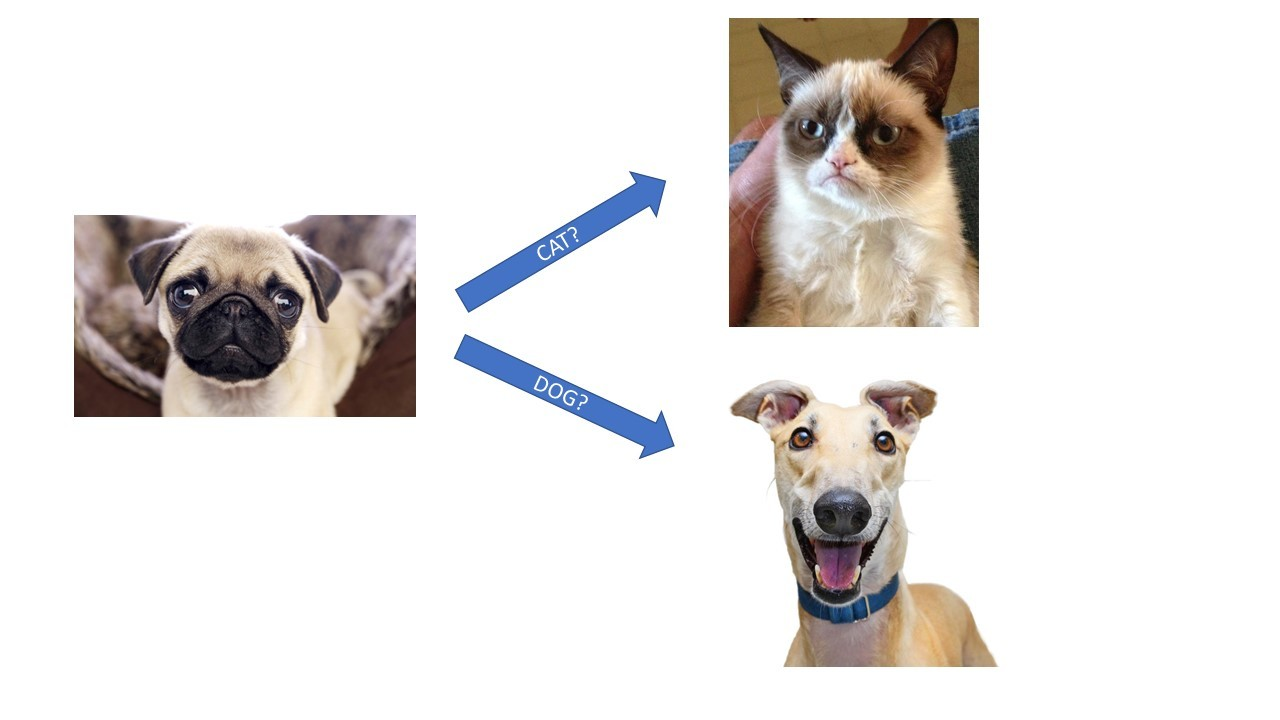

### Ejemplo Churn

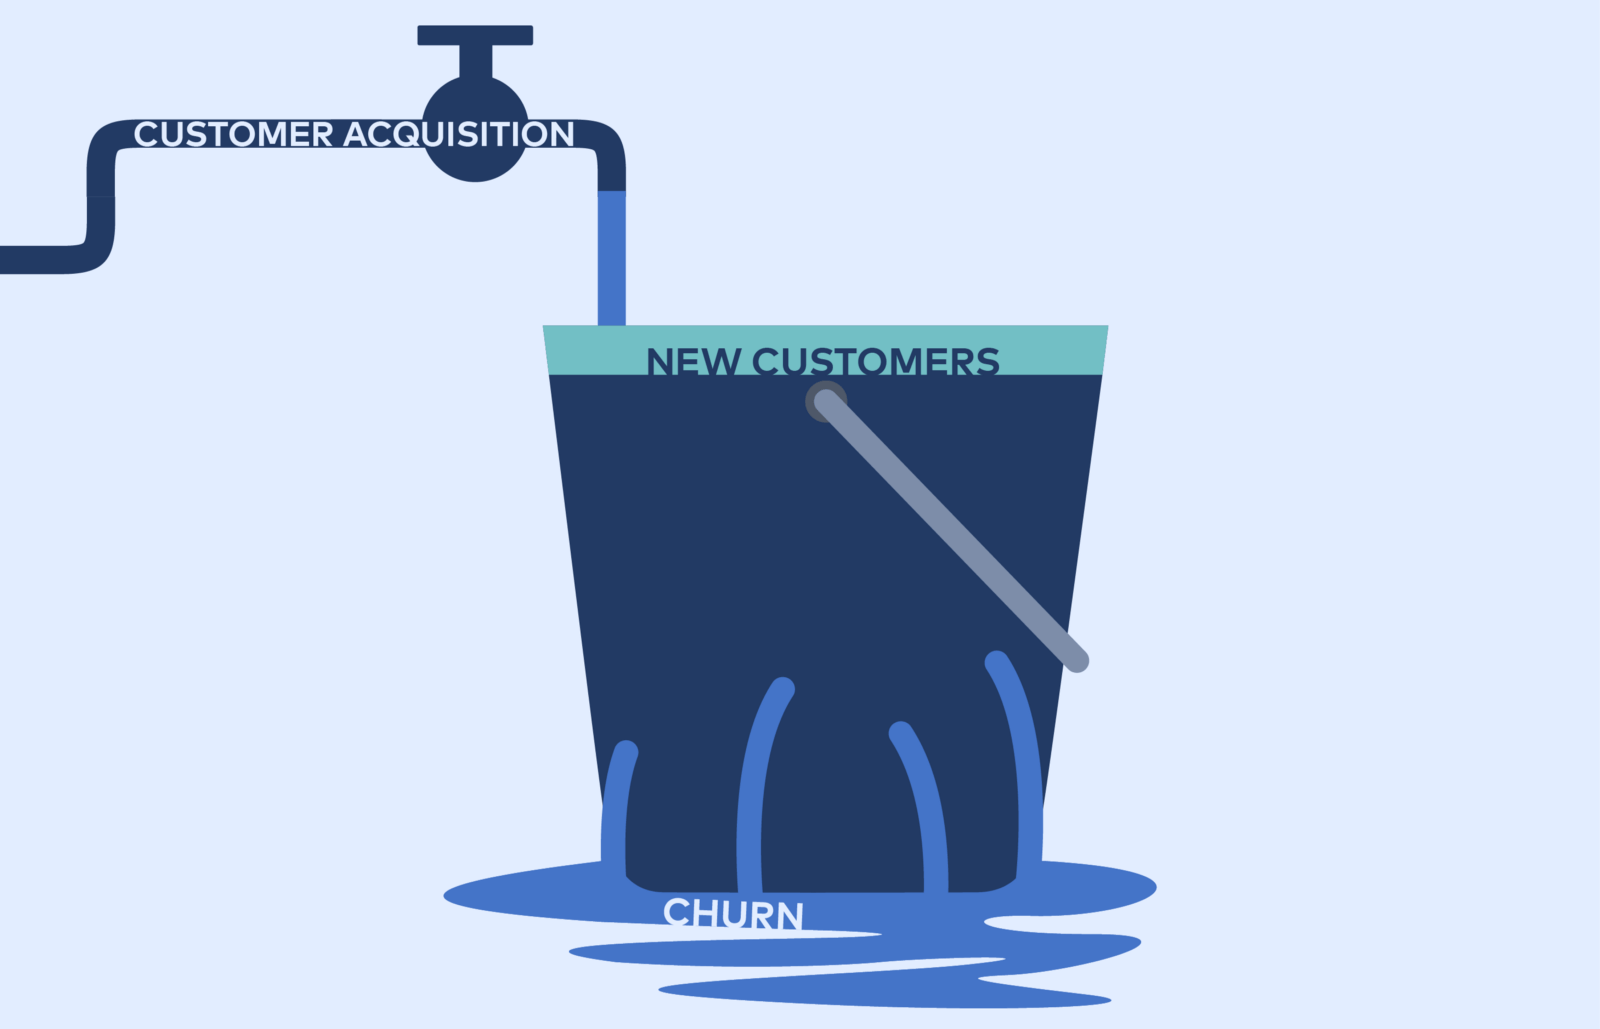

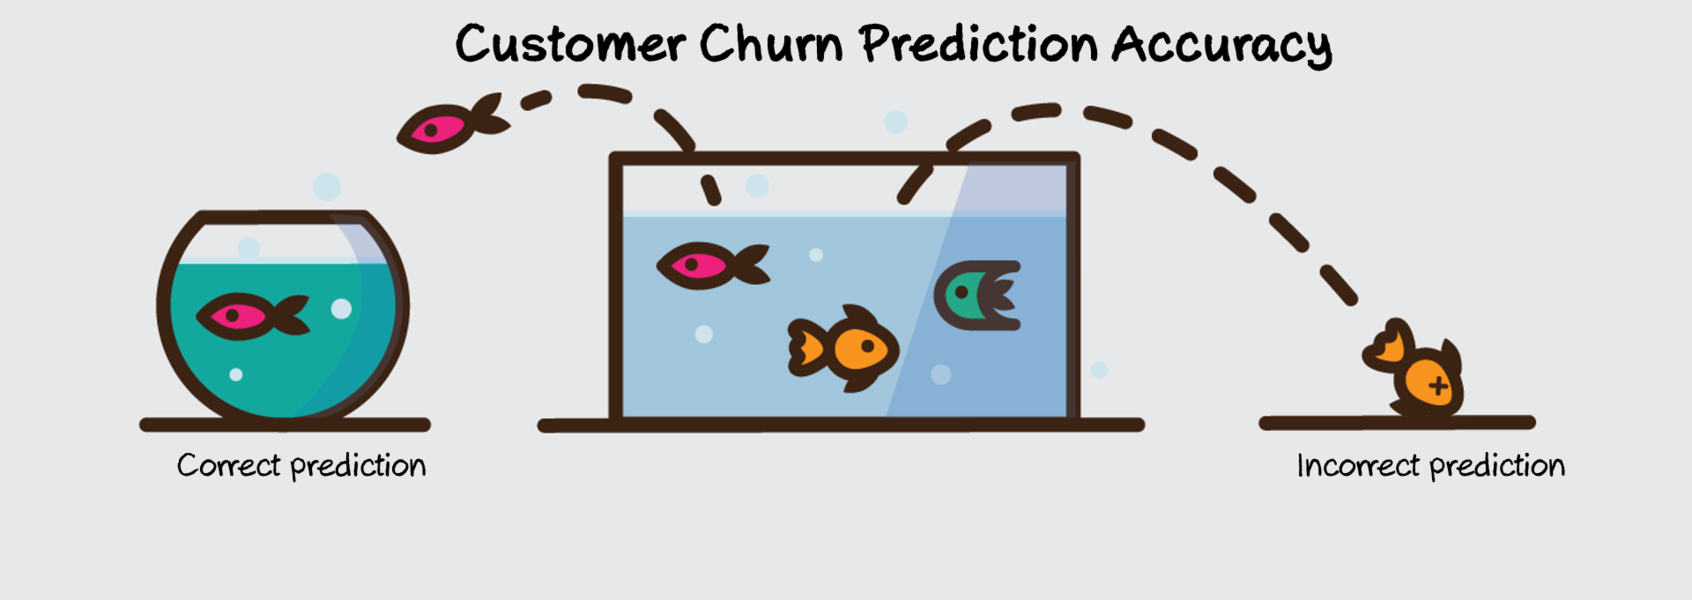



In [1]:
import pandas as pd                                # panel data, for handling dataframes
pd.set_option('display.max_columns', None)         # show all columns of the dataframe

import numpy as np                                 # numerical python, linear algebra library

import pylab as plt                                # plotting library
import seaborn as sns                              # plotting library
sns.set(style='white')                             # seaborn style


from sklearn.linear_model import LogisticRegression # logistic regression model
from xgboost import XGBRFClassifier 

from sklearn.preprocessing import StandardScaler               # standarized
from sklearn.preprocessing import LabelEncoder               

from sklearn.model_selection import train_test_split as tts    # split data into train and test sets


### Datos

In [2]:
df=pd.read_csv('../Data/churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthLevel,TotalLevel,TenureLevel,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low,Very Low,New,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Low,Moderate,Loyal,0.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Low,Very Low,New,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Low,Moderate,Loyal,0.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moderate,Very Low,New,1.0


In [3]:
df.shape

(7032, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

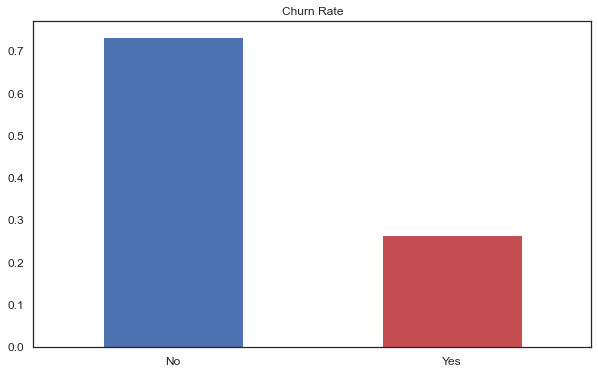

In [6]:
(df.Churn.value_counts()/len(df)).plot.bar(color=['b', 'r'],    # plot customer churn rate
                                           figsize=(10, 6),
                                           title='Churn Rate',
                                           rot=0,
                                           fontsize=12);


df.Churn.value_counts()/len(df)

### Transformacion

In [7]:
corr=df._get_numeric_data().corr()   # correlation matrix

corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChurnBinary
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
ChurnBinary,0.150541,-0.354049,0.192858,-0.199484,1.000000


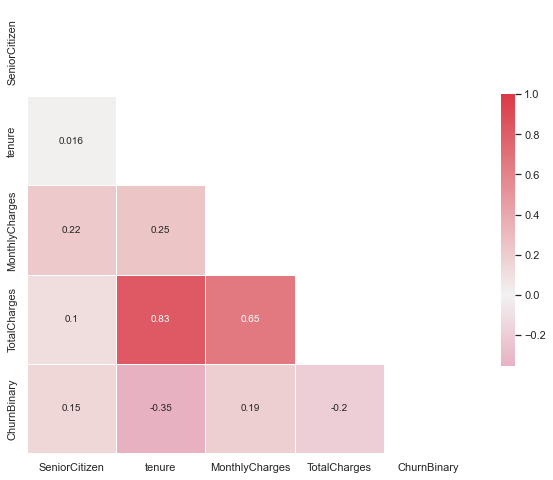

In [8]:
fig, ax=plt.subplots(figsize=(10,10))


mask=np.triu(np.ones_like(corr, dtype=bool))           # mask for superior triangular matrix


color_map=sns.diverging_palette(0, 10, as_cmap=True)   # color palette


# correlation heatmap
sns.heatmap(corr,                       # data
            mask=mask,                  # white mask
            cmap=color_map,             # color
            vmax=1,                     # vertical edge
            center=0,                   # plot center
            square=True,                # data square representation
            linewidth=.5,               # linewidth
            cbar_kws={'shrink': .5},    # lateral bar legend
            annot = True,               # valor de correlacion
            ax=ax                       # axes for plot size
           );

### Normalizacion

In [9]:
data_num=pd.DataFrame(StandardScaler().fit_transform(df._get_numeric_data()),
                      
                      columns=df._get_numeric_data().columns)


data_obj=df.select_dtypes(include='object')

data=pd.concat([data_num, data_obj], axis=1)

data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChurnBinary,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthLevel,TotalLevel,TenureLevel
0,-0.440327,-1.280248,-1.161694,-0.994194,-0.601663,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,Low,Very Low,New
1,-0.440327,0.064303,-0.260878,-0.173740,-0.601663,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,Low,Moderate,Loyal
2,-0.440327,-1.239504,-0.363923,-0.959649,1.662059,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,Low,Very Low,New
3,-0.440327,0.512486,-0.747850,-0.195248,-0.601663,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,Low,Moderate,Loyal
4,-0.440327,-1.239504,0.196178,-0.940457,1.662059,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,Moderate,Very Low,New


### Label Encoding

In [10]:
le=LabelEncoder()

for c in data.columns:
    
    if data.dtypes[c]==object:
        
        le.fit(data[c].astype(str))
        
        data[c]=le.transform(data[c].astype(str))

In [11]:
data.shape

(7032, 25)

In [12]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChurnBinary,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthLevel,TotalLevel,TenureLevel
0,-0.440327,-1.280248,-1.161694,-0.994194,-0.601663,5365,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,4,1
1,-0.440327,0.064303,-0.260878,-0.173740,-0.601663,3953,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,1,2,0
2,-0.440327,-1.239504,-0.363923,-0.959649,1.662059,2558,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,1,4,1
3,-0.440327,0.512486,-0.747850,-0.195248,-0.601663,5524,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,1,2,0
4,-0.440327,-1.239504,0.196178,-0.940457,1.662059,6500,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,2,4,1


### Modelado

In [13]:
X=data.drop(['Churn', 'ChurnBinary', 'customerID'], axis=1)  # separacion X y

y=data.Churn

In [14]:
X.shape, y.shape

((7032, 22), (7032,))

In [15]:
X_train, X_test, y_train, y_test=tts(X, y, random_state=42, stratify=y)

In [16]:
y_train.value_counts(), y_test.value_counts()

(0    3872
 1    1402
 Name: Churn, dtype: int64,
 0    1291
 1     467
 Name: Churn, dtype: int64)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5274, 22), (1758, 22), (5274,), (1758,))

In [18]:
logreg=LogisticRegression(max_iter=2000)
xgbc = XGBRFClassifier()

In [19]:
logreg.fit(X_train, y_train)
xgbc.fit(X_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', scale_pos_weight=1, ...)

In [20]:
y_pred    =logreg.predict(X_test)
y_pred_xgb=xgbc.predict(X_test)

y_pred[:10], y_pred_xgb[:10]

(array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0]), array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0]))

In [21]:
y_prob     =logreg.predict_proba(X_test)
y_prob_xgb =xgbc.predict_proba(X_test)

y_prob[:10], y_prob_xgb[:10]

(array([[0.32892511, 0.67107489],
        [0.98790709, 0.01209291],
        [0.5765804 , 0.4234196 ],
        [0.23556142, 0.76443858],
        [0.89875859, 0.10124141],
        [0.77167556, 0.22832444],
        [0.99340661, 0.00659339],
        [0.71596247, 0.28403753],
        [0.21860806, 0.78139194],
        [0.95868167, 0.04131833]]),
 array([[0.3131798 , 0.6868202 ],
        [0.8679405 , 0.13205951],
        [0.56601715, 0.43398288],
        [0.29373944, 0.70626056],
        [0.8488594 , 0.15114059],
        [0.7695169 , 0.23048311],
        [0.8778002 , 0.1221998 ],
        [0.7191335 , 0.28086653],
        [0.28483635, 0.71516365],
        [0.8763866 , 0.12361342]], dtype=float32))

In [23]:
( sum(y_pred==y_test)/y_pred.shape[0] * 100,  
sum(y_pred_xgb==y_test)/y_pred_xgb.shape[0] * 100)  # acierto, accuracy

(79.92036405005688, 79.92036405005688)

In [24]:
logreg.coef_

array([[ 0.08539868, -0.83219269,  0.85838248,  0.08433841, -0.03686372,
         0.03387301, -0.23710976, -0.97976289,  0.1154813 ,  0.2183582 ,
        -0.29402933, -0.16667669, -0.06177041, -0.27830544,  0.02988564,
         0.0025462 , -0.77326615,  0.35112667,  0.07779736,  0.00184069,
         0.14602005,  0.04122884]])

In [25]:
logreg.intercept_

array([-0.54253206])

In [29]:
dict(zip(X.columns, xgbc.feature_importances_))

{'SeniorCitizen': 0.011426898,
 'tenure': 0.055697743,
 'MonthlyCharges': 0.022272311,
 'TotalCharges': 0.024309082,
 'gender': 0.008730168,
 'Partner': 0.005631297,
 'Dependents': 0.009536789,
 'PhoneService': 0.0086899595,
 'MultipleLines': 0.019134834,
 'InternetService': 0.10315052,
 'OnlineSecurity': 0.18868642,
 'OnlineBackup': 0.012410207,
 'DeviceProtection': 0.012121855,
 'TechSupport': 0.08047514,
 'StreamingTV': 0.012164833,
 'StreamingMovies': 0.009746365,
 'Contract': 0.34537342,
 'PaperlessBilling': 0.0136406785,
 'PaymentMethod': 0.008892063,
 'MonthLevel': 0.015563225,
 'TotalLevel': 0.026875524,
 'TenureLevel': 0.0054705907}

In [30]:
y_prob=[e[1] for e in y_prob]
y_prob_xgb = [e[1] for e in y_prob_xgb]

In [31]:
y_pred_prime=[0 if e<0.25 else 1 for e in y_prob]
y_pred_prime_xgb=[0 if e<0.25 else 1 for e in y_prob_xgb]# 1 si prob>0.25

In [32]:
(sum(y_pred_prime==y_test)/y_test.shape[0] * 100,   
sum(y_pred_prime_xgb==y_test)/y_test.shape[0] * 100) # acierto, accuracy

(72.6962457337884, 70.81911262798634)

In [33]:
from sklearn.metrics import f1_score, roc_auc_score

In [34]:
f1_score(y_test, y_pred), f1_score(y_test, y_pred_xgb)

(0.6029246344206974, 0.5636588380716935)

In [36]:
#Aqui estamos evaluando sobre el riesgo de fuga, no sobre si el modelo ha dicho si el cliente se va o no.

roc_auc_score(y_test, y_prob), roc_auc_score(y_test, y_prob_xgb)

(0.8371405065873607, 0.8359462727464226)

In [40]:
X_test['score'] = y_prob

In [44]:
X_test = X_test.sort_values('score', ascending=False)

In [46]:
X_test.shape

(1758, 23)

In [49]:
int(round(X_test.shape[0]*0.02, 0))

35

In [52]:
risk_cust = X_test[:int(round(X_test.shape[0]*0.02, 0))]

In [53]:
risk_cust.gender.value_counts(normalize=True)

0    0.542857
1    0.457143
Name: gender, dtype: float64

In [64]:
data1 = df.reset_index()

In [57]:
risk_cust = risk_cust.reset_index()

In [59]:
data1.head()

,index,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChurnBinary,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthLevel,TotalLevel,TenureLevel
0,0,-0.440327,-1.280248,-1.161694,-0.994194,-0.601663,5365,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,4,1
1,1,-0.440327,0.064303,-0.260878,-0.173740,-0.601663,3953,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,1,2,0
2,2,-0.440327,-1.239504,-0.363923,-0.959649,1.662059,2558,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,1,4,1
3,3,-0.440327,0.512486,-0.747850,-0.195248,-0.601663,5524,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,1,2,0
4,4,-0.440327,-1.239504,0.196178,-0.940457,1.662059,6500,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,2,4,1


In [65]:
prueba = pd.merge(left=data1, right=risk_cust[['index','score']],how='inner', on='index')

In [66]:
prueba

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthLevel,TotalLevel,TenureLevel,ChurnBinary,score
0,346,2034-GDRCN,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.40,168.20,Yes,High,Very Low,New,1.0,0.823269
1,383,5167-ZFFMM,Male,0,No,No,1,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),90.85,90.85,Yes,High,Very Low,New,1.0,0.786793
2,581,2865-TCHJW,Female,1,No,No,4,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,346.20,Yes,High,Low,New,1.0,0.792332
3,641,0970-ETWGE,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.55,89.55,Yes,High,Very Low,New,1.0,0.818842
4,933,6630-UJZMY,Female,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.25,308.05,No,High,Low,New,0.0,0.790056
5,1691,8593-WHYHV,Male,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.30,264.80,Yes,High,Very Low,New,1.0,0.817149
6,1875,6474-FVJLC,Male,0,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,86.00,165.45,Yes,High,Very Low,New,1.0,0.824529
7,2392,3722-WPXTK,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,88.35,88.35,Yes,High,Very Low,New,1.0,0.813700
8,2459,2609-IAICY,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,77.15,77.15,Yes,Moderate,Very Low,New,1.0,0.795905
9,2505,3707-GNWHM,Male,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.25,74.25,Yes,Moderate,Very Low,New,1.0,0.789011


In [67]:
prueba.Contract.value_counts(normalize=True)

Month-to-month    1.0
Name: Contract, dtype: float64

In [68]:
df.Contract.value_counts(normalize=True)

Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: Contract, dtype: float64